# Impact

In [1]:
# to import gammaALPs, this cell should be only executed once after kernel restart
%cd ..
%cd ..

/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs


/home/flandgraf/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt

import healpy as hp
import time

fatal: No names found, cannot describe anything.


In [3]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

In [4]:
EGeV = np.logspace(2., 4.26, 101)  # the energy range, matching LHAASO (500 GeV - 18 TeV)
src = Source(z=0.151, ra='9h13m03.48s', dec='+19d46m24.6s')  # position of GRB221009A
pa_in = np.diag([0., 0., 1.])  # the inital polarization matrix; a pure ALP state

m = 10
g = 0.4

ml = [ModuleList(ALP(m=m, g=g), src, pin=pa_in, EGeV=EGeV, seed=0) for i in range(10)]

models = ['base', 'expX', 'neCL', 'twistX', 'nebCor', 'cre10', 'synCG', 'spur']
for i in range(8):
    ml[i].add_propagation("GMF", 0, model='UF23', UF23_model=models[i])

ml[8].add_propagation("GMF", 0, model="jansson12")
ml[9].add_propagation("GMF", 0, model="pshirkov")

environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi


In [5]:
px, py, pa = np.zeros((3, 10, EGeV.size))
for i in range(10):
    px[i], py[i], pa[i] = ml[i].run()

   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:799: UserWarning: Not all values of linear polarization are real values!
  warnings.warn("Not all values of linear polarization are real values!")
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:802: UserWarning: Not all values of circular polarization are real values!
  warnings.warn("Not all values of circular polarization are real values!")
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running 

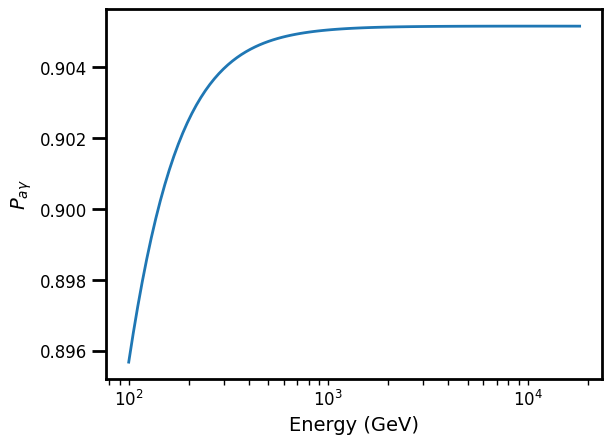

In [6]:
i=9
b=0
plt.semilogx(EGeV, (px[i]+py[i])/(px[b] + py[b]), lw = 2)
#plt.semilogx(EGeV, (px[0] + py[0]), lw = 2)
plt.xlabel("Energy (GeV)")
plt.ylabel(r"$P_{a\gamma}$")

#plt.ylim(0.049, 50)
plt.show()

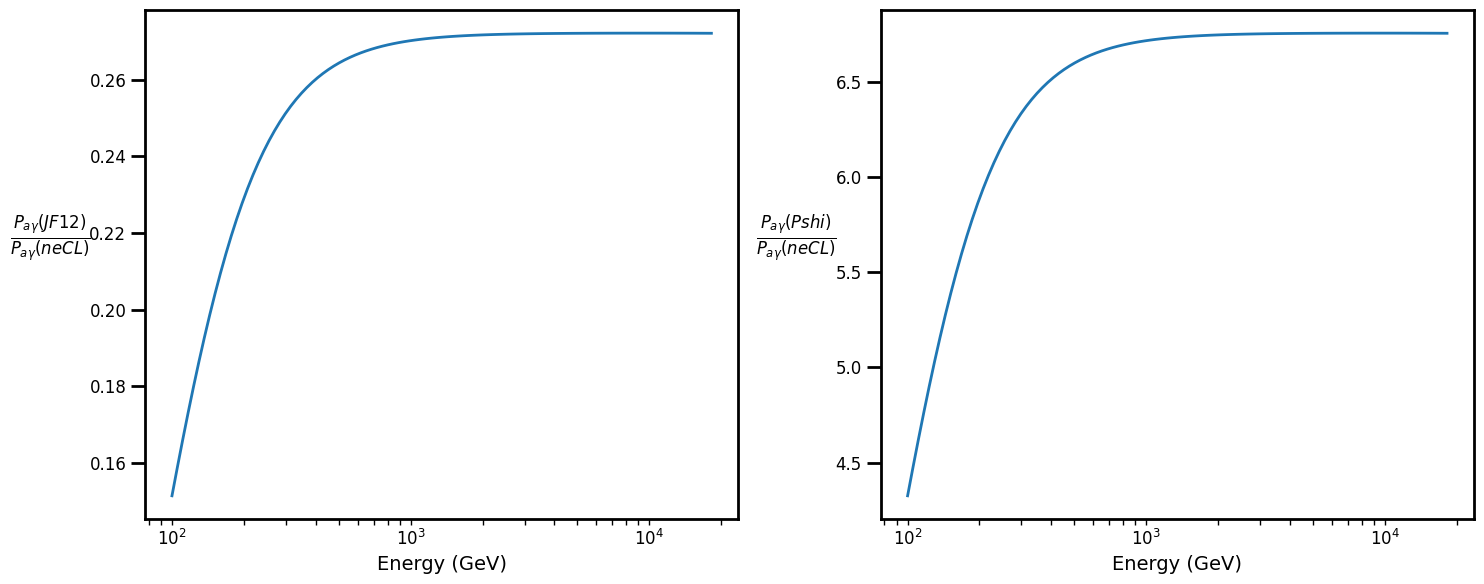

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15, 6)) 
i=8
j=9
b=3
lp=28

#axs[0,0].set_title('m = 0.5 neV')
axs[0].semilogx(EGeV, (px[i]+py[i])/(px[b] + py[b]), lw = 2)
axs[0].set_ylabel(r"$\frac{P_{a\gamma}(JF12)}{P_{a\gamma}(neCL)}$", rotation=0, fontsize=17, labelpad=lp)
axs[0].set_xlabel("Energy (GeV)")
#axs[0].set_ylim(0.05,0.08)

#axs[0,1].set_title('m = 0.5 neV')
axs[1].semilogx(EGeV, (px[j]+py[j])/(px[b] + py[b]), lw = 2)
axs[1].set_ylabel(r"$\frac{P_{a\gamma}(Pshi)}{P_{a\gamma}(neCL)}$", rotation=0, fontsize=17, labelpad=lp)
axs[1].set_xlabel("Energy (GeV)")
#axs[1].set_ylim(1.5,1.9)
#for ax in axs.flat:
#    ax.set_ylim(0.8,1.2)

fig.tight_layout()
#plt.savefig('notebooks/UF23/plots/Effect/1_grb_neCL.png')
plt.show()